<a href="https://colab.research.google.com/github/peaceemenike/Artificial-Intelligent/blob/main/MLP%20on%20Digits%20Dataset/MLP_on_Digits_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Part 2: MLP on Digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Data
digits = load_digits()
X = digits.images.astype("float32") / 16.0
X = X.reshape((X.shape[0], -1))
y = digits.target

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [ ]:
# Model: single fit with early stopping
mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation="relu",
    solver="adam",
    alpha=1e-4,
    learning_rate_init=1e-3,
    max_iter=200,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42,
    verbose=False
)

mlp.fit(X_train, y_train)


MLPClassifier(early_stopping=True, hidden_layer_sizes=(128, 64),
              random_state=42)

In [ ]:
#  Evaluation
val_pred = mlp.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)
print(f"Validation accuracy: {val_acc:.3f}")

Validation accuracy: 0.978


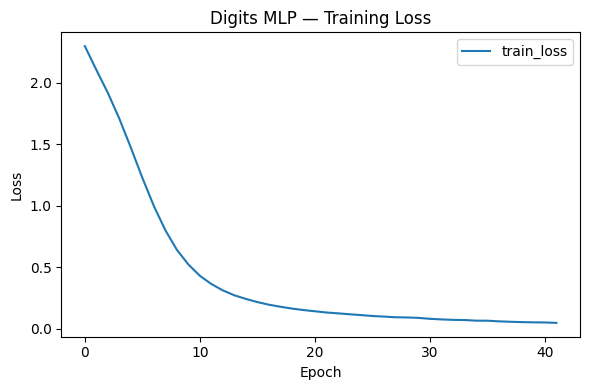

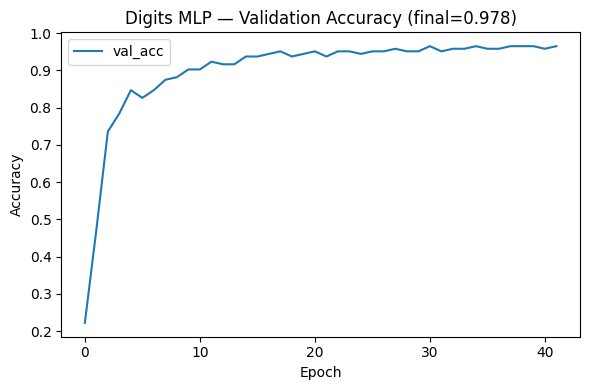

In [ ]:
# Curves: training loss and validation scores
plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_, label="train_loss")
plt.xlabel("Epoch"); plt.ylabel("Loss")
plt.title("Digits MLP — Training Loss")
plt.legend(); plt.tight_layout(); plt.show()

# validation_scores
if hasattr(mlp, "validation_scores_"):
    plt.figure(figsize=(6,4))
    plt.plot(mlp.validation_scores_, label="val_acc")
    plt.xlabel("Epoch"); plt.ylabel("Accuracy")
    plt.title(f"Digits MLP — Validation Accuracy (final={val_acc:.3f})")
    plt.legend(); plt.tight_layout(); plt.show()

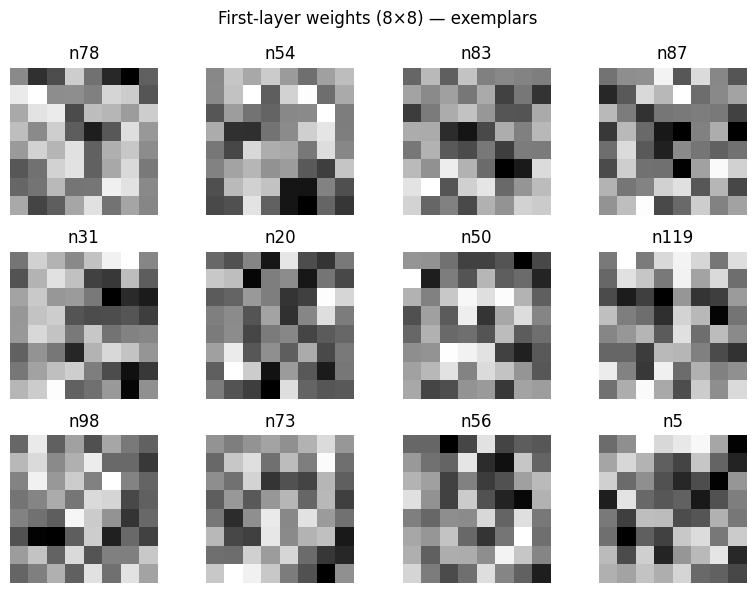

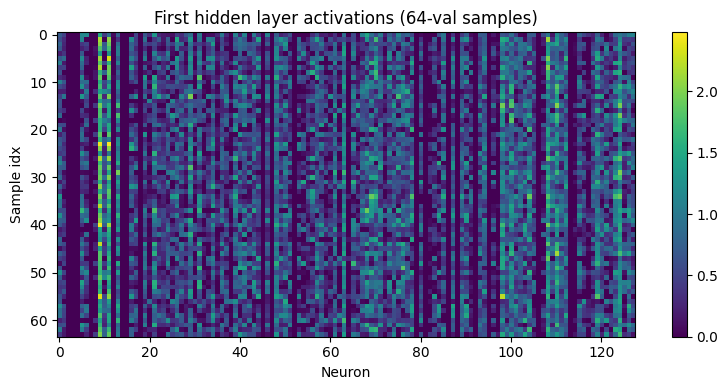

In [ ]:
# First-layer weights as images
W1 = mlp.coefs_[0]

# neurons with largest weight norms
neuron_order = np.argsort(np.linalg.norm(W1, axis=0))[::-1][:12]
fig, axes = plt.subplots(3, 4, figsize=(8,6))
for ax, idx in zip(axes.ravel(), neuron_order):
    ax.imshow(W1[:, idx].reshape(8,8), cmap="gray")
    ax.axis("off"); ax.set_title(f"n{idx}")
fig.suptitle("First-layer weights (8×8) — exemplars", y=0.98)
plt.tight_layout(); plt.show()

# First hidden layer activations
def relu(z): return np.maximum(0, z)
A1 = relu(X_val[:64] @ mlp.coefs_[0] + mlp.intercepts_[0])
plt.figure(figsize=(8,4))
plt.imshow(A1, aspect="auto")
plt.colorbar(); plt.xlabel("Neuron"); plt.ylabel("Sample idx")
plt.title("First hidden layer activations (64-val samples)")
plt.tight_layout(); plt.show()

## line comparison to classical ML:

- The MLP outperformed the shallow tree on a more complex vision task.

- DL learns layered features automatically (no manual feature engineering).

- It requires tuning (layers, dropout, epochs) but scales better to high-dimensional inputs.